# Credit Risk Classification Models

**Objective:** Apply models to accurately determine credit scores based on customer profiles. Focus on identifying "poor" credit scores to avoid future loans to high-risk customers, aiming for maximum recall metric while maintaining balance.

### **Document structure**

1. **Data Preparation**
	- Import dataset, libraries and metrics
	- Splitting and scaling data
2. **Models Fitting and Tuning**
3. **Models Evaluating**
	- Key metrics
	- Confusion matrices
	- ROC curves
4. **Evaluate Selected Model on Test Data**
	- Show metrics
	- Display confusion matrix
	- Analyze feature importance

## Data Preparation

### Import dataset, libraries and metrics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv(r"prepared_data.csv").sample(30000)
df.head(10)

,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Age_bin_20-30,Age_bin_30-40,Age_bin_40-50,Age_bin_50-60,Age_bin_60+,Spent_Behaviour_Low,Value_Payments_Medium,Value_Payments_Small
32558,7,33.0,149700580.0,39799.400,3049.616667,5.0,7.0,12.0,3.0,10.0,...,1,0,0,1,0,0,0,0,0,1
83701,6,32.0,91751836.0,31024.770,2415.397500,4.0,5.0,8.0,2.0,13.0,...,1,0,0,1,0,0,0,1,0,1
9914,3,41.0,898354224.0,17122.370,1183.864167,7.0,5.0,12.0,2.0,14.0,...,0,1,0,0,1,0,0,1,1,0
53935,8,44.0,973120733.0,15990.655,1244.554583,7.0,3.0,17.0,5.0,6.0,...,0,0,0,0,1,0,0,1,0,1
28260,5,15.0,775215508.0,38644.160,3102.346667,6.0,8.0,28.0,5.0,26.0,...,0,1,0,0,0,0,0,1,1,0
84383,8,47.0,417486289.0,75408.440,6403.036667,0.0,1.0,6.0,3.0,16.0,...,1,0,0,0,1,0,0,0,0,0
80767,8,34.0,670934185.0,60574.480,5338.873333,6.0,10.0,24.0,2.0,26.0,...,0,1,0,1,0,0,0,1,0,1
46256,1,53.0,785292037.0,16476.040,1106.003333,1.0,3.0,11.0,0.0,11.0,...,0,0,0,0,0,1,0,0,0,1
60972,5,40.0,597296705.0,18770.300,1514.191667,1.0,1.0,5.0,3.0,12.0,...,1,0,0,1,0,0,0,1,0,1
19883,4,15.0,527960772.0,17609.570,1442.464167,6.0,10.0,16.0,5.0,36.0,...,0,1,0,0,0,0,0,0,1,0


### Splitting and scaling data

In [3]:
X = df.drop("Is_Poor_Credit_Score", axis=1)
y = df["Is_Poor_Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [4]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

## Models Fitting and Tuning

### K-NN

In [5]:
knn_params = {"n_neighbors": range(1, 51)}
grid_serach = GridSearchCV(KNeighborsClassifier(n_jobs=-1), knn_params, n_jobs=-1).fit(X_train_scale, y_train)

In [6]:
knn_best_params = grid_serach.best_params_
knn = KNeighborsClassifier(**knn_best_params, n_jobs=-1).fit(X_train_scale, y_train)

### Logistic Regression

In [7]:
logreg_params = {
    "penalty": ["l1", "l2", "elasticnet"],
	"C": np.linspace(0.1, 2, 20),
    "l1_ratio": np.linspace(0, 1, 11)
}

logreg_model = LogisticRegression(solver="saga", n_jobs=-1, random_state=101)
grid_serach = GridSearchCV(logreg_model, logreg_params, n_jobs=-1).fit(X_train_scale, y_train)

In [8]:
logreg_best_params = grid_serach.best_params_
logreg = LogisticRegression(**logreg_best_params, solver="saga", max_iter=10000, n_jobs=-1).fit(X_train_scale, y_train)

### Decision Tree

In [9]:
tree_params = {
    "max_depth": range(1, 21),
	"min_samples_leaf": range(1, 21),
    "criterion": ["gini", "log_loss", "entropy"]
}

grid_serach = GridSearchCV(DecisionTreeClassifier(random_state=101), tree_params, n_jobs=-1).fit(X_train_scale, y_train)

In [10]:
tree_best_params = grid_serach.best_params_
tree = DecisionTreeClassifier(**tree_best_params).fit(X_train_scale, y_train)

### Random Forest

In [11]:
forest_params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features': [None, "sqrt"],
    'bootstrap': [True, False],
    'max_samples': [None, .3, .5, .9],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2, 5, 10, 20, 100],
}

forest_model = RandomForestClassifier(n_jobs=-1, random_state=101)
random_search = RandomizedSearchCV(forest_model, forest_params, n_iter=100, n_jobs=-1).fit(X_train_scale, y_train)

c:\Users\gnoev\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gnoev\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gnoev\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gnoev\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 402, in fit
    raise ValueErr

In [12]:
forest_best_params = random_search.best_params_
forest = RandomForestClassifier(**forest_best_params, n_jobs=-1).fit(X_train_scale, y_train)

### Gradient Boosting

In [13]:
gradient_params = {
    'n_estimators': [20, 40, 60, 80, 100, 200],
    'learning_rate': [.01, .1],
    'max_features': ["sqrt"],
    'subsample': [.8, .9, .95],
    'max_depth': np.arange(start=3, stop=12, step=2),
    'min_samples_leaf': [2, 5, 10]    
}

gradient_model = GradientBoostingClassifier(random_state=101)
gradient_search = RandomizedSearchCV(gradient_model, gradient_params, n_iter=100, n_jobs=-1).fit(X_train_scale, y_train)

In [14]:
gradient_best_params = gradient_search.best_params_
gradient = GradientBoostingClassifier(**gradient_best_params).fit(X_train_scale, y_train)

## Models Evaluating

In [15]:
def moving_threshold(model, X, y):
    f1 = []
    thresholds = np.linspace(0, 1, 100)

    for thresh in thresholds:
        y_pred =(model.predict_proba(X)[:,1] > thresh)
        f1.append(f1_score(y, y_pred))

    value = f1.index(max(f1)) / 100
    return value

def model_performance(model, X, y, threshold=False):
	if threshold == True:
		value = moving_threshold(model, X, y)
		y_pred = model.predict_proba(X)[:, 1] > value
	if threshold == False:
		y_pred = model.predict(X)

	accuracy = accuracy_score(y, y_pred).round(3)
	precision = precision_score(y, y_pred).round(3)
	recall = recall_score(y, y_pred).round(3)
	f1 = f1_score(y, y_pred).round(3)

	data = {"accuracy": [accuracy], "precision": [precision], "recall": [recall], "f1": [f1]}
	return pd.DataFrame(data)

### Key metrics

In [16]:
frame = pd.DataFrame()
col_names = ["knn", "knn_balanced", "log_reg", "log_reg_balanced", "tree", "tree_balanced", "forest", "forest_balanced", "gradient", "gradient_balanced"]

for model in [knn, logreg, tree, forest, gradient]:
    frame = pd.concat([frame, model_performance(model, X_train_scale, y_train, False)])
    frame = pd.concat([frame, model_performance(model, X_train_scale, y_train, True)])

model_name = pd.DataFrame(col_names, columns=["model"])
output = pd.concat([model_name, frame.reset_index(drop=True)], axis=1)

In [17]:
output.sort_values(["f1", "accuracy"], ascending=[False, False])

,model,accuracy,precision,recall,f1
0,knn,1.000,1.000,1.000,1.000
1,knn_balanced,1.000,1.000,1.000,1.000
8,gradient,1.000,1.000,1.000,1.000
9,gradient_balanced,1.000,1.000,1.000,1.000
7,forest_balanced,0.877,0.778,0.801,0.789
6,forest,0.868,0.810,0.708,0.756
5,tree_balanced,0.833,0.690,0.763,0.725
4,tree,0.847,0.776,0.659,0.713
3,log_reg_balanced,0.784,0.608,0.696,0.649
2,log_reg,0.788,0.675,0.510,0.581


### Confusion matrices

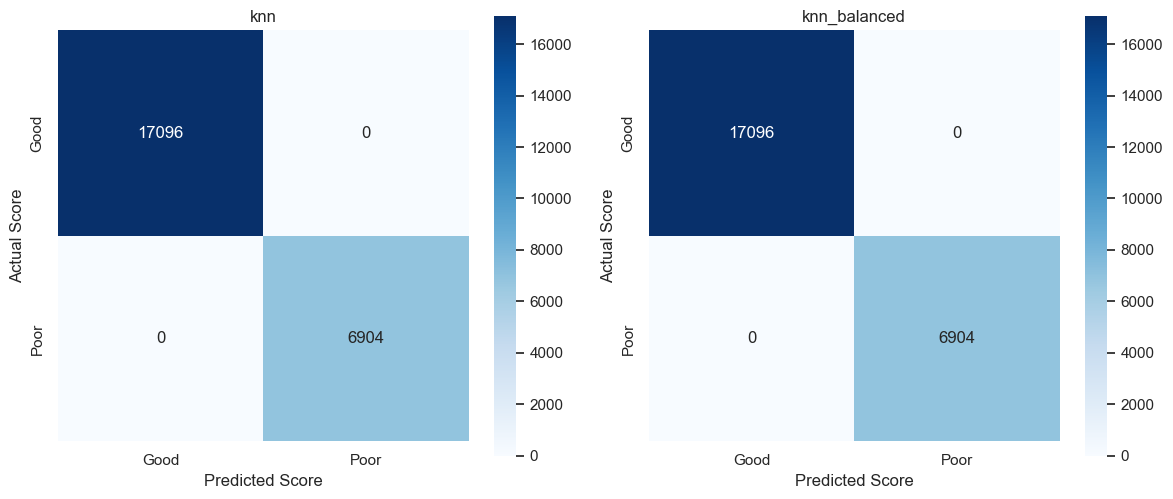

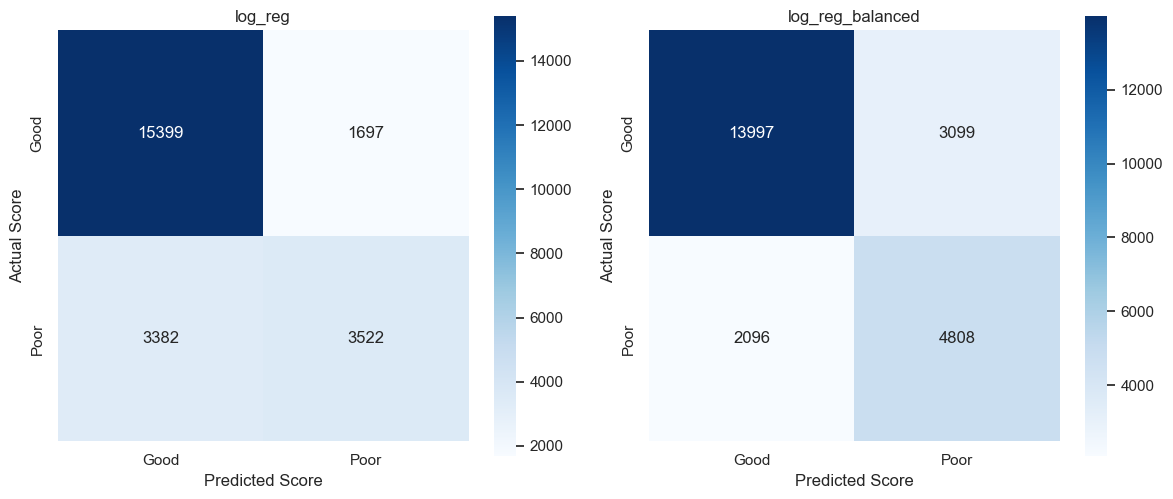

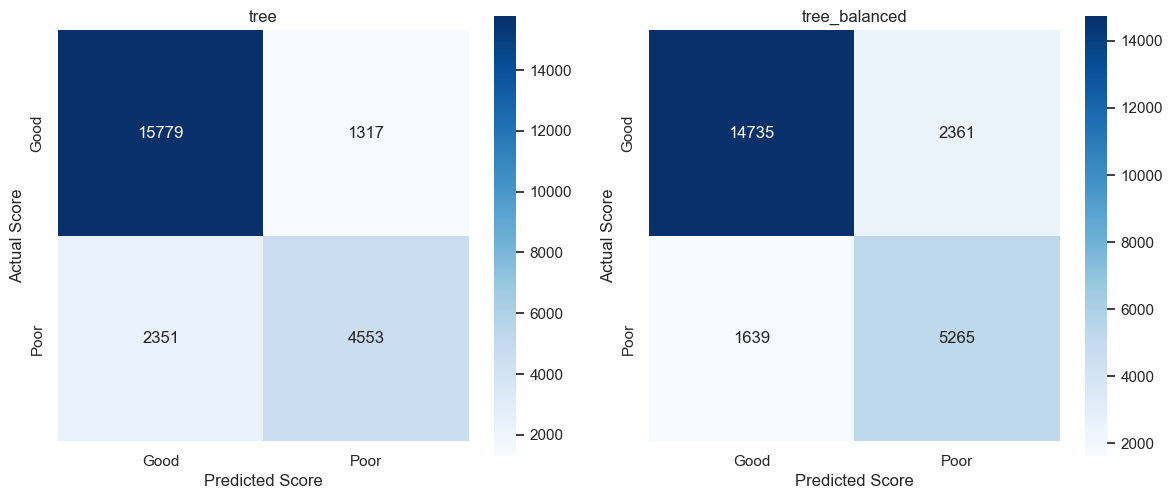

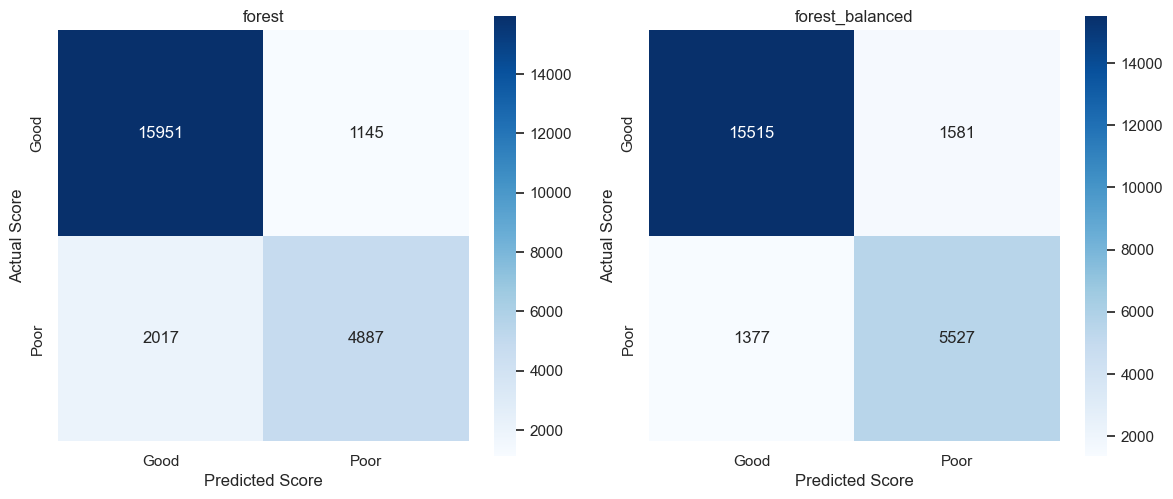

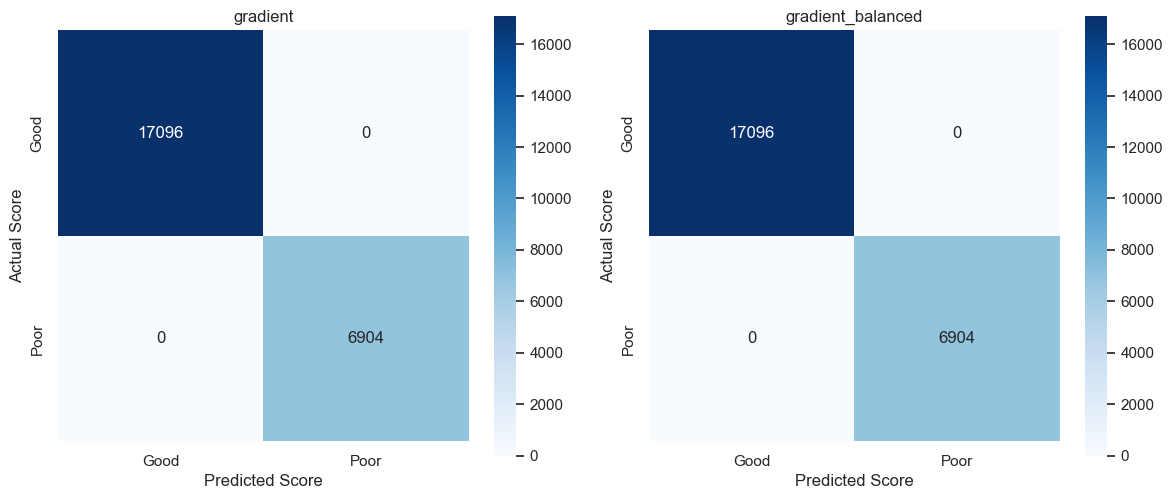

In [18]:
x_labels, y_labels = ["Good", "Poor"], ["Good", "Poor"]
model_names = [("knn", "knn_balanced"), ("log_reg", "log_reg_balanced"), ("tree", "tree_balanced"), ("forest", "forest_balanced"), ("gradient", "gradient_balanced")]

for i, (model, balanced_name) in enumerate(zip([knn, logreg, tree, forest, gradient], model_names)):
    value = moving_threshold(model, X_train_scale, y_train)
    y_pred = model.predict_proba(X_train_scale)[:, 1] > value

    standart = confusion_matrix(y_train, model.predict(X_train_scale))
    balanced = confusion_matrix(y_train, y_pred)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(standart, cmap="Blues", annot=True, fmt="g", square=True, xticklabels=x_labels, yticklabels=y_labels, ax=axes[0])
    axes[0].set_xlabel("Predicted Score")
    axes[0].set_ylabel("Actual Score")
    axes[0].set_title(f"{balanced_name[0]}")

    sns.heatmap(balanced, cmap="Blues", annot=True, fmt="g", square=True, xticklabels=x_labels, yticklabels=y_labels, ax=axes[1])
    axes[1].set_xlabel("Predicted Score")
    axes[1].set_ylabel("Actual Score")
    axes[1].set_title(f"{balanced_name[1]}")

    plt.subplots_adjust(hspace=1)
    plt.tight_layout()
    plt.show();

### ROC curves + AUC metric

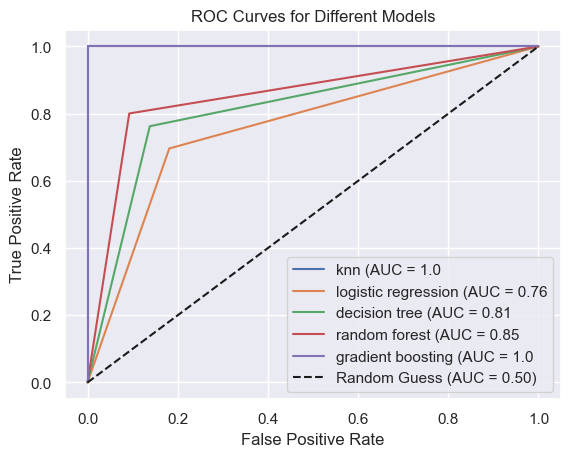

In [19]:
models_names = ["knn", "logistic regression", "decision tree", "random forest", "gradient boosting"]

for i, model in enumerate([knn, logreg, tree, forest, gradient]):
	value = moving_threshold(model, X_train_scale, y_train)
	y_pred = model.predict_proba(X_train_scale)[:, 1] > value

	fpr, tpr, thresholds = roc_curve(y_train, y_pred)
	auc_score = round(auc(fpr, tpr), 2)

	plt.plot(fpr,tpr,label=f"{models_names[i]} (AUC = {auc_score}")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.show();

## Evaluate Selected Model on Test Data - Gradient Boosting

### Metrics

In [56]:
model_performance(gradient, X_test_scale, y_test, threshold=True)

,accuracy,precision,recall,f1
0,0.864,0.726,0.853,0.784


### Confusion matrix

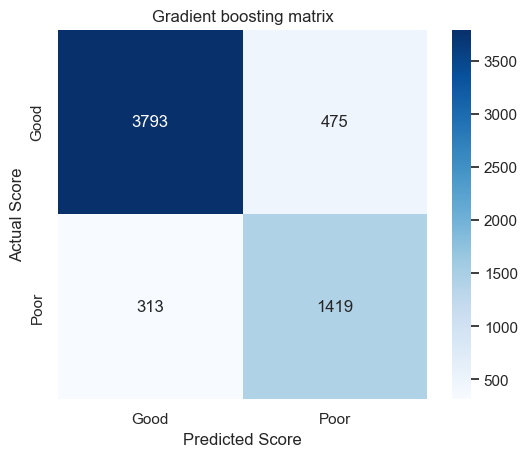

In [58]:
value = moving_threshold(tree, X_test_scale, y_test)
y_pred = model.predict_proba(X_test_scale)[:, 1] > value

sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", annot=True, fmt="g", square=True, xticklabels=x_labels, yticklabels=y_labels)
plt.title("Gradient boosting matrix")
plt.xlabel("Predicted Score")
plt.ylabel("Actual Score")
plt.show();

### Analyse feature importance

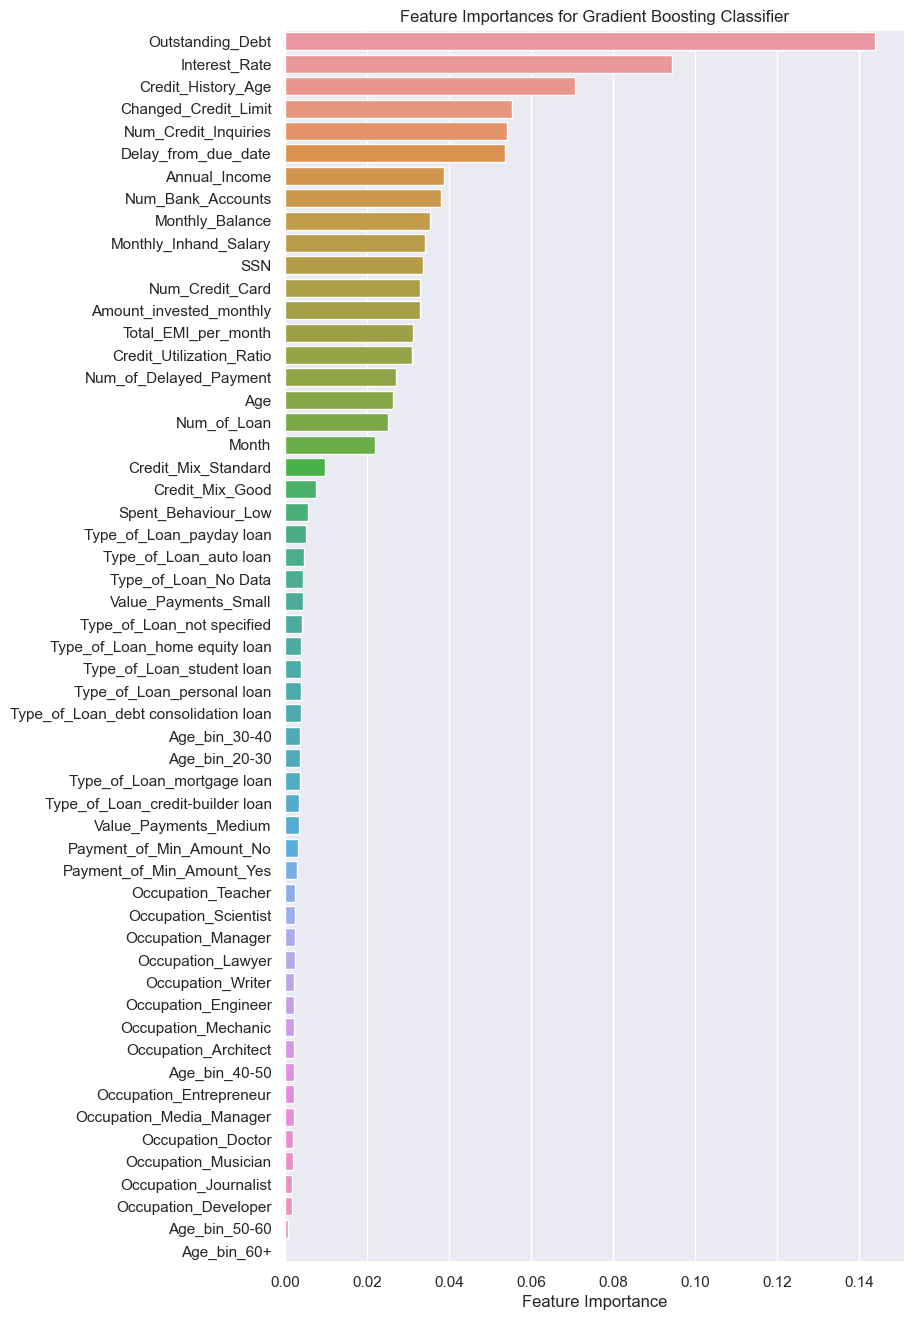

In [71]:
data = list(zip(X.columns, gradient.feature_importances_))
importance_df = pd.DataFrame(data, columns=["column_name", "value"]).sort_values("value", ascending=False)

plt.figure(figsize=(8, 16))
sns.barplot(x="value", y="column_name", data=importance_df)
plt.xlabel("Feature Importance")
plt.ylabel("")
plt.title("Feature Importances for Gradient Boosting Classifier")
plt.show();